# <span style="color:blue"> **MINIPROYECTO - DEEP LEARNING - TEAM 12**<br></span>

## <span style="color:dodgerblue"> **INTRODUCCIÓN:**<br></span>
El presente miniproyecto se basa en las características musicales de una canción y si estas influyen o son determinantes respecto del año de publicación o lanzamiento. En resumen, ¿Existe una relación entre las características musicales de una canción y el año en que fue publicada/lanzada? Una respuesta positiva a esta pregunta revelaría una profunda comprensión de la naturaleza de una composición musical y, lo que es más importante, esta comprensión se demostraría matemáticamente.

En este proyecto, se utilizan datos reales para predecir el año en que fue lanzada una canción a partir de sus características del timbre en la grabación. En total, son 90 atributos predictores: los 12 primeros corresponden al timbre promedio y los 78 siguientes a la covarianza. Originalmente, este tipo de datos fue recolectado en un proyecto llamado Million Song Dataset de la Universidad de Columbia (http://millionsongdataset.com/). Los datos a trabajar tienen los mismos predictores pero con canciones no consideradas en la base de datos original.

<span style="color:dodgerblue">**INSTRUCCIONES**<br><br></span>
Para el proyecto fue solicitado realizar un **modelamiento predictivo mediante el uso de los modelos de redes neuronales** que se han visto en el curso.

En general, se deben reportar los resultados del modelamiento predictivo siguiendo los pasos que se muestran a continuación:

1. Exploración de los datos para su entendimiento dentro del contexto organizacional.
2. Preparación de los datos para poder utilizarlos como entrada para modelos predictivos.
3. Análisis preliminar de selección de modelos relevantes para responder a la pregunta.
4. Desarrollo y calibración de modelos.
5. Visualización de resultados.

<span style="color:dodgerblue">**DATASETS PROPORCIONADOS**<br></span>
1. sampleSubmission.csv
2. testReg.csv
3. trainReg.csv
Disponibles en: https://www.kaggle.com/competitions/music-year-prediction/data

<span style="color:dodgerblue">**LEADERBOARD Y OTROS DATOS**<br></span>
Enlace de la competencia: https://www.kaggle.com/competitions/music-year-prediction/

<span style="color:dodgerblue">**INTEGRANTES DEL EQUIPO 12**<br></span>
- Christian Beraún Chamorro
- D’sharlie Sánchez Rozo
- William Alexander Morales Valera


In [1]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## <span style="color:dodgerblue"> **PARTE 1: EXPLORACIÓN DE LOS DATOS Y CONTEXTO ORGANIZACIONAL**<br></span>

In [2]:
# Cargar los datos
train_data = pd.read_csv('trainReg.csv')
test_data = pd.read_csv('testReg.csv')

In [3]:
train_data

,ID,Y,V1,V2,V3,V4,V5,V6,V7,V8,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,1,2013,44.81144,0.83826,0,7.91314,10.94148,-0.04547,-15.16332,-10.47324,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
1,2,1998,41.99180,7.99976,0,64.26707,16.54115,-9.28737,-40.73524,33.60440,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
2,3,1998,42.19196,2.23111,0,65.07719,24.99746,1.76100,6.66573,3.45778,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
3,4,1998,39.28634,-1.85716,0,91.04190,9.08333,0.08502,-5.59216,65.62463,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
4,5,1998,40.36025,2.94918,0,53.83723,13.71369,-8.21964,-40.21636,21.22366,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77774,96428,2004,33.76706,-3.80678,0,-1.44169,23.78801,5.01781,1.58966,-25.02281,...,-36.84706,-637.31267,-174.93600,127.32951,-15.75226,-144.64697,6.53731,5.54065,193.68594,32.75930
77775,96432,2004,25.77805,2.41861,0,5.96418,-8.43658,-1.36182,2.51784,-18.57770,...,27.76376,-44.59643,-116.15080,-34.33917,4.86612,141.37999,282.57252,23.32459,125.07389,-19.16268
77776,96433,2004,24.78656,1.36415,0,34.13329,34.32996,-0.95170,75.33572,-28.59028,...,33.73262,-206.05602,44.10029,-635.01673,-16.75481,114.74225,-192.79351,-4.44202,1457.72692,-50.93615
77777,96434,2006,39.67698,3.65167,0,34.04925,-0.68467,-2.13911,-5.70096,-10.57862,...,-15.46611,-117.84462,139.93465,67.70637,-24.18488,-39.54694,185.26251,-1.37534,216.14774,-12.75066


In [4]:
train_data.describe()

,ID,Y,V1,V2,V3,V4,V5,V6,V7,V8,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
count,77779.000000,77779.000000,77779.000000,77779.000000,77779.0,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,...,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000,77779.000000
mean,48244.238342,2002.308129,43.425185,-0.136720,0.0,3.755313,-2.339768,-1.643095,-6.814997,-9.587264,...,15.717215,-71.733008,41.679287,37.816353,0.328213,17.575097,-25.628857,4.463484,18.664885,1.240194
std,27846.283673,10.811038,6.128869,4.370466,0.0,17.609183,14.483975,7.898574,22.980515,12.911914,...,32.211995,176.893351,123.523393,95.335357,16.272689,115.243644,173.310304,13.526414,186.690183,22.379654
min,1.000000,1926.000000,4.836880,-69.680870,0.0,-165.221610,-121.475340,-72.503850,-152.407550,-70.693420,...,-424.517570,-4402.376440,-1733.722110,-1848.702260,-238.386730,-3168.924570,-4319.992320,-236.039260,-7458.378150,-281.150600
25%,24079.500000,1998.000000,40.060315,-2.612435,0.0,-7.016240,-10.685075,-6.300690,-21.265305,-18.583065,...,-1.968265,-136.511095,-21.467975,-4.604295,-6.702370,-31.569390,-100.668480,-2.569360,-60.121980,-8.900120
50%,48357.000000,2006.000000,44.323850,-0.063000,0.0,2.022100,-2.054560,-1.586240,-6.307610,-11.238330,...,9.079980,-51.322570,28.217560,33.417370,0.788980,15.237360,-21.581640,3.136900,5.941490,-0.095340
75%,72340.500000,2010.000000,47.900080,2.465950,0.0,12.776450,6.423900,3.077055,7.617995,-2.329330,...,26.211700,13.999870,89.190475,77.216175,8.354270,67.361475,51.333150,10.002145,84.389125,9.520700
max,96435.000000,2014.000000,60.034010,23.815260,0.0,274.658580,160.815220,68.447960,262.068870,112.971410,...,840.973380,2147.942140,3210.701700,1482.642140,199.121500,2144.103910,2833.608950,275.353660,5289.111380,600.766240


Al respecto, procedemos a analizar las Variables Predictoras y la Variable de interés (Año de Lanzamiento : Y). Dado que V3 tiene valores "0", se descarta para los siguientes análisis. Asimismo, "ID" es el orden del registro, también se descarta.

In [5]:
X = train_data.drop(columns=['ID','V3',"Y"])
Y = train_data[['Y']]                 

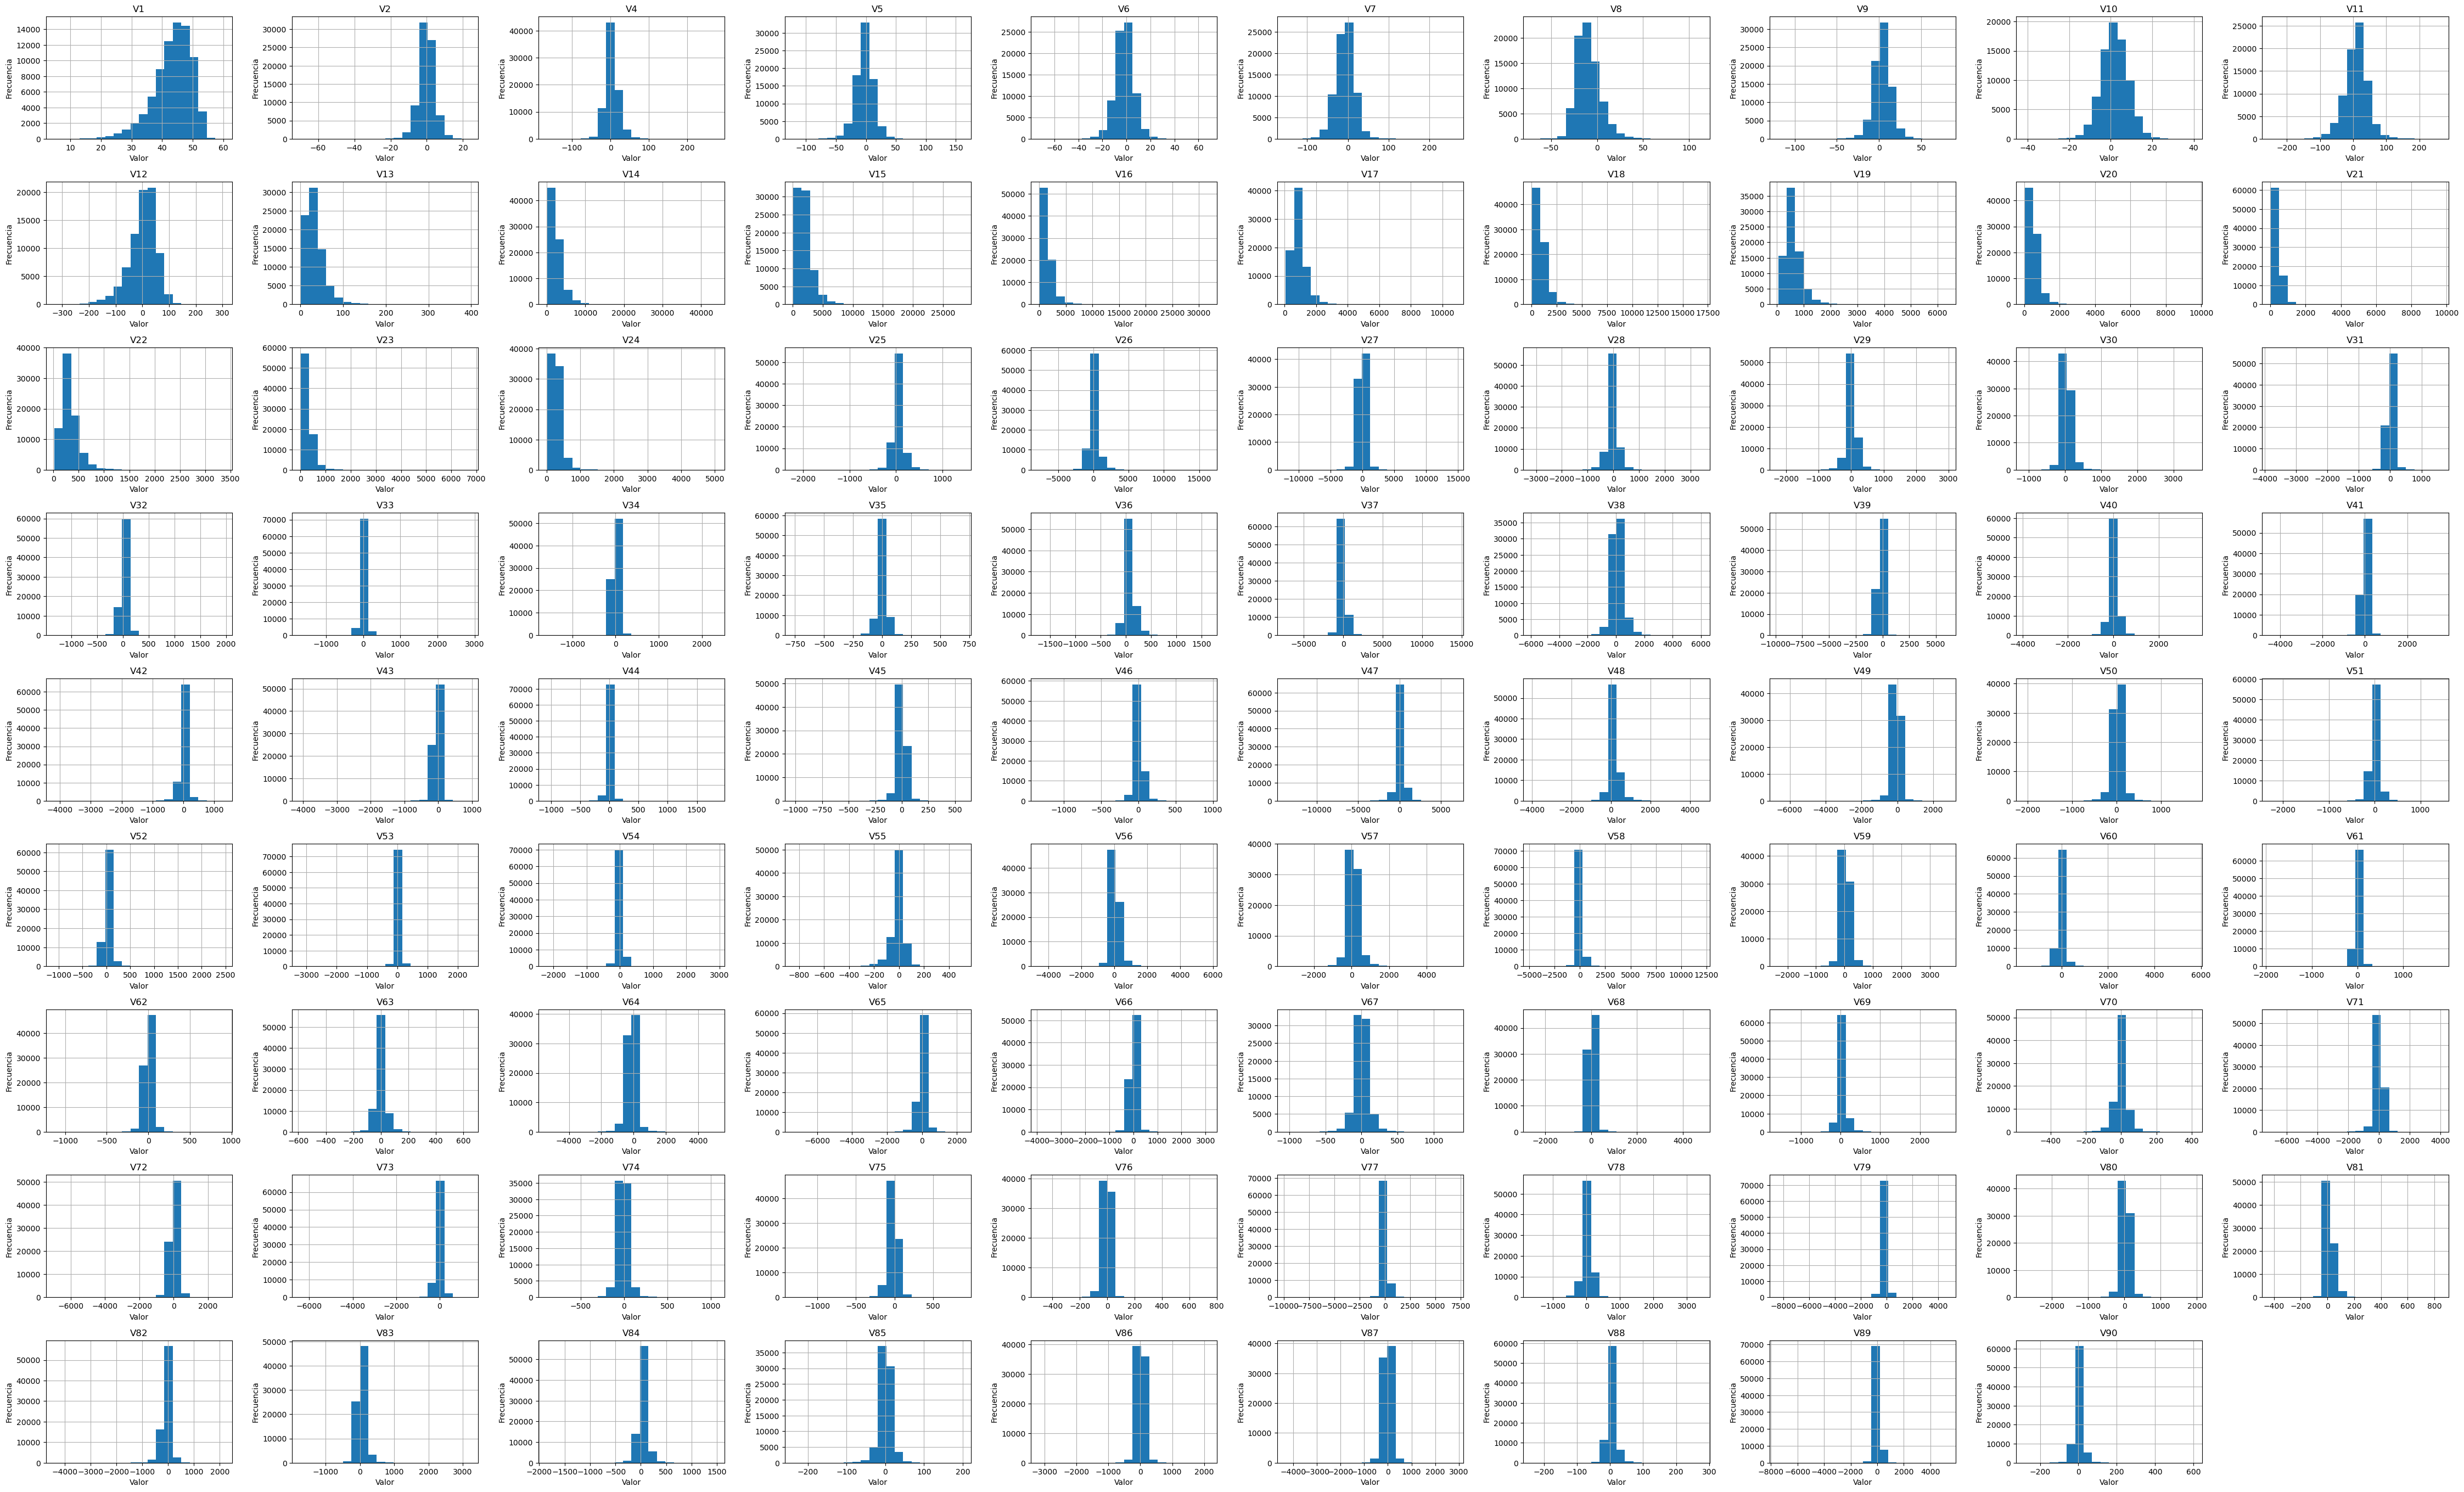

In [6]:
num_columns = len(X.columns)
num_rows = (num_columns + 10) // 5 
plt.figure(figsize=(15 * 3, num_rows * 3))  
for i, column in enumerate(X.columns):
    ax = plt.subplot(num_rows, 10, i + 1)  
    X[column].hist(bins=20, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
plt.tight_layout() 
plt.show()

<Figure size 800x600 with 0 Axes>

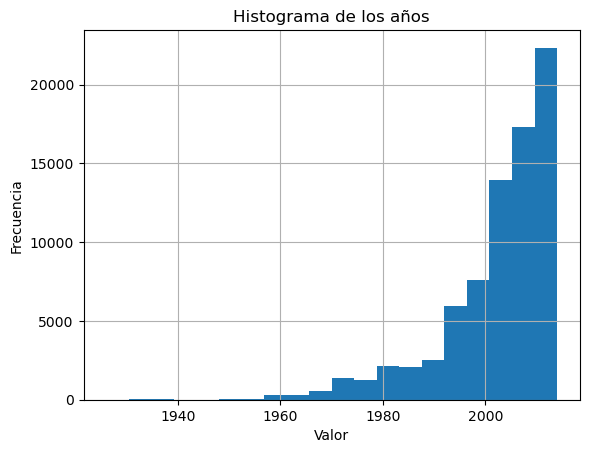

In [7]:
plt.figure(figsize=(8, 6))
Y.hist(bins=20)  
plt.title('Histograma de los años')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

Como podemos observar, existe una distribución mayor para los años más cercanos a la fecha; ello podría deberse a que los datos se encuentran disponibles en diversas plataformas streaming de música, tal como lo precisa en la página web de los datasets: <br>

- SecondHandSongs dataset -> cover songs <br>
- musiXmatch dataset -> lyrics<br>
- Last.fm dataset -> song-level tags and similarity<br>
- Taste Profile subset -> user data<br>
- thisismyjam-to-MSD mapping -> more user data<br>
- tagtraum genre annotations -> genre labels<br>
- Top MAGD dataset -> more genre labels<br>

Ahora bien, tengamos en cuenta este dato importante "los 12 primeros (V1 A V12) corresponden al timbre promedio y los 78 siguientes a la covarianza (V13 a V90)". Analizaremos la correlación que existe entre las variables predictoras con la variable de interés:

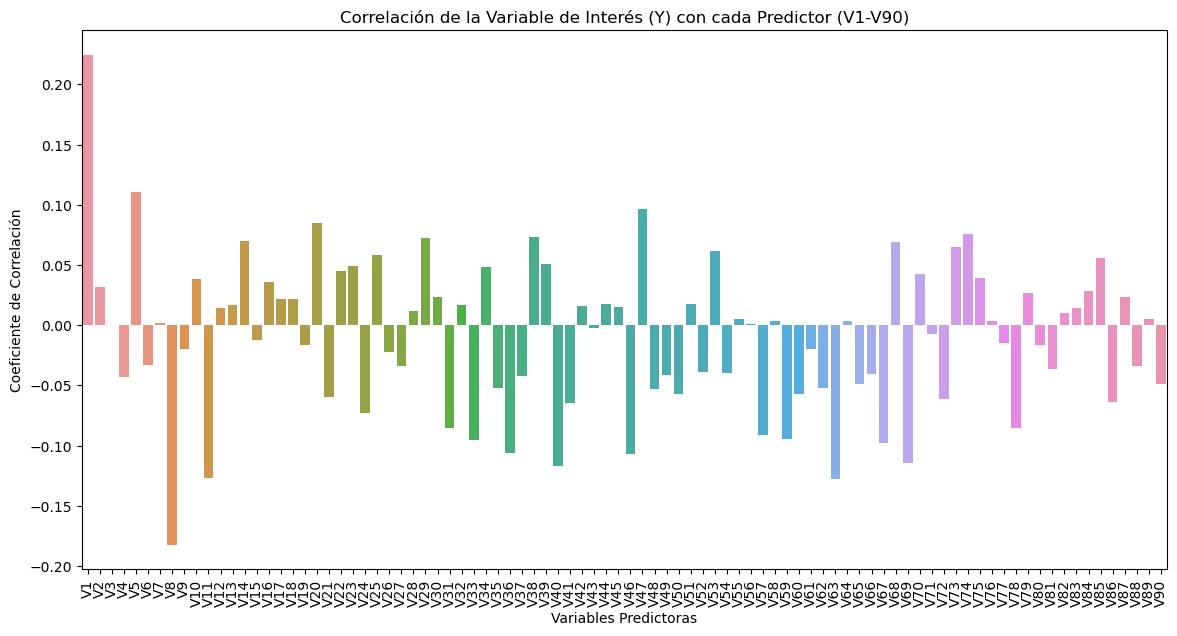

In [8]:
predictors = [f'V{i}' for i in range(1, 91)]
data_subset = train_data[predictors + ['Y']]
correlation_matrix = data_subset.corr()
target_correlation = correlation_matrix['Y'].drop('Y') 
plt.figure(figsize=(14, 7))
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.xticks(rotation=90)  
plt.title('Correlación de la Variable de Interés (Y) con cada Predictor (V1-V90)')
plt.xlabel('Variables Predictoras')
plt.ylabel('Coeficiente de Correlación')

plt.show()

## <span style="color:dodgerblue"> **PARTE 2: PREPARACIÓN DE LOS DATOS PARA MODELOS PREDICTIVOS**<br></span>

Como pudimos observar, las variables predictoras van de V1 a V90, pero se debe eliminar V3 y ID, siendo que no agregan valor al modelo, por ser valores vacíos o el índice de los registros.

In [9]:
X = train_data.drop(columns=['ID','V3',"Y"])
Y = train_data[['Y']]   

In [10]:
X

,V1,V2,V4,V5,V6,V7,V8,V9,V10,V11,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,44.81144,0.83826,7.91314,10.94148,-0.04547,-15.16332,-10.47324,14.17212,10.57382,-11.21128,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
1,41.99180,7.99976,64.26707,16.54115,-9.28737,-40.73524,33.60440,9.18802,-6.79144,44.21327,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
2,42.19196,2.23111,65.07719,24.99746,1.76100,6.66573,3.45778,-24.42779,-18.45069,233.16766,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
3,39.28634,-1.85716,91.04190,9.08333,0.08502,-5.59216,65.62463,8.33105,11.70269,79.90772,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
4,40.36025,2.94918,53.83723,13.71369,-8.21964,-40.21636,21.22366,17.16742,0.14463,72.23955,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77774,33.76706,-3.80678,-1.44169,23.78801,5.01781,1.58966,-25.02281,25.90399,19.87408,-21.41492,...,-36.84706,-637.31267,-174.93600,127.32951,-15.75226,-144.64697,6.53731,5.54065,193.68594,32.75930
77775,25.77805,2.41861,5.96418,-8.43658,-1.36182,2.51784,-18.57770,-25.69885,9.97971,-100.96885,...,27.76376,-44.59643,-116.15080,-34.33917,4.86612,141.37999,282.57252,23.32459,125.07389,-19.16268
77776,24.78656,1.36415,34.13329,34.32996,-0.95170,75.33572,-28.59028,-31.86076,-4.06444,-53.17960,...,33.73262,-206.05602,44.10029,-635.01673,-16.75481,114.74225,-192.79351,-4.44202,1457.72692,-50.93615
77777,39.67698,3.65167,34.04925,-0.68467,-2.13911,-5.70096,-10.57862,-1.30048,9.85726,7.33263,...,-15.46611,-117.84462,139.93465,67.70637,-24.18488,-39.54694,185.26251,-1.37534,216.14774,-12.75066


In [11]:
Y

,Y
0,2013
1,1998
2,1998
3,1998
4,1998
...,...
77774,2004
77775,2004
77776,2004
77777,2006


In [12]:
missing_values = X.isnull().sum()
print("Número de valores nulos por columna:")
print(missing_values)

Número de valores nulos por columna:
V1     0
V2     0
V4     0
V5     0
V6     0
      ..
V86    0
V87    0
V88    0
V89    0
V90    0
Length: 89, dtype: int64


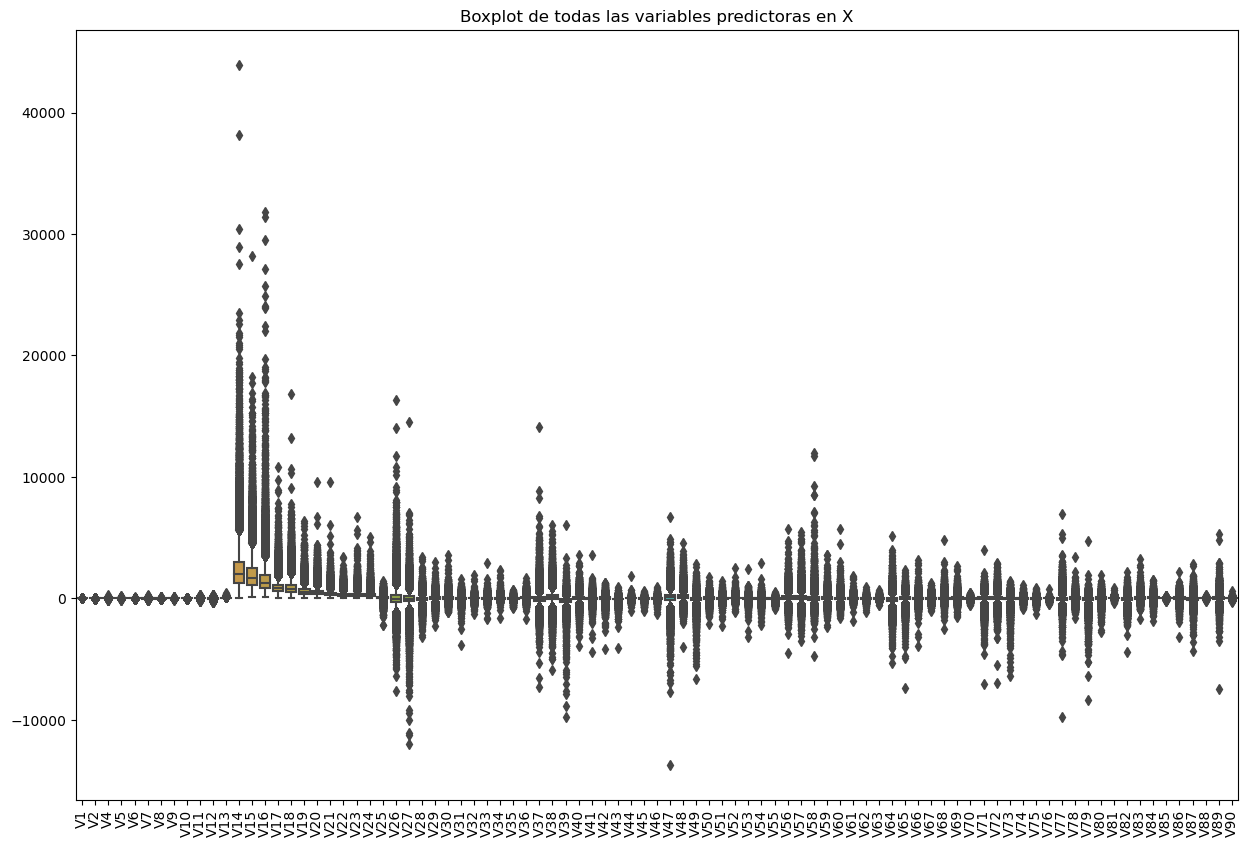

In [13]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplot de todas las variables predictoras en X')
plt.show()

Ahora bien, si observamos las variables V14 en adelante, podemos ver que hay mucha variabilidad. Mientras que de V1 a V12, no hay mucha. 

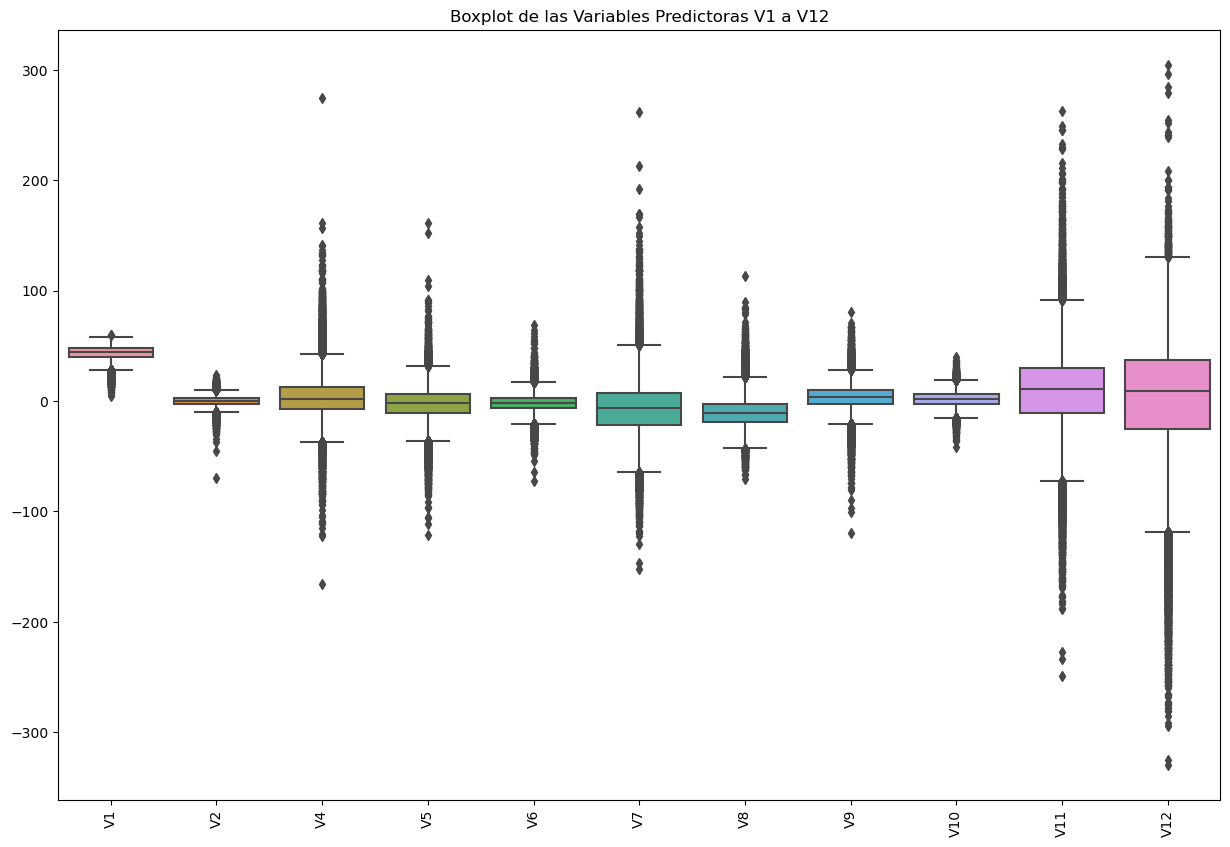

In [14]:
X_subset = X[['V1', 'V2', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12']]

plt.figure(figsize=(15, 10))
sns.boxplot(data=X_subset)
plt.xticks(rotation=90)  
plt.title('Boxplot de las Variables Predictoras V1 a V12')
plt.show()

Considerando todo lo anterior, se vió por conveniente crear variables que capturen los datos de V1 a V12 y de V13 a V90, usando métricas como suma, promedio, mediana, producto, entre otras. Conforme se detalla a continuación:

In [15]:
train_data = train_data.drop(columns=['ID','V3'])
test_data = test_data.drop(columns=['ID'])

def create_features(data):
    timbre_cols = [f"V{i}" for i in range(1, 13) if i != 3]
    if all(col in data.columns for col in timbre_cols):
        data['mean_timbre'] = data[timbre_cols].mean(axis=1)
        data['median_timbre'] = data[timbre_cols].median(axis=1)
        data['std_timbre'] = data[timbre_cols].std(axis=1)
        data['sum_timbre'] = data[timbre_cols].sum(axis=1)
        data['max_timbre'] = data[timbre_cols].max(axis=1)
        data['min_timbre'] = data[timbre_cols].min(axis=1)
        data['prod_timbre'] = data[timbre_cols].prod(axis=1)
    else:
        print("Algunas columnas necesarias (V1, V2, V4 a V12) no existen en el DataFrame")
    if all(f"V{i}" in data.columns for i in range(13, 91)):
        covariance_cols = [f"V{i}" for i in range(13, 91)]
        data['mean_covariance'] = data[covariance_cols].mean(axis=1)
        data['median_covariance'] = data[covariance_cols].median(axis=1)
        data['std_covariance'] = data[covariance_cols].std(axis=1)
        data['sum_covariance'] = data[covariance_cols].sum(axis=1)
        data['max_covariance'] = data[covariance_cols].max(axis=1)
        data['min_covariance'] = data[covariance_cols].min(axis=1)
        data['prod_covariance'] = np.exp(data[covariance_cols].apply(np.log).sum(axis=1))
    else:
        print("Algunas columnas de V13 a V90 no existen en el DataFrame")

    return data
train_data = create_features(train_data)
test_data = create_features(test_data)

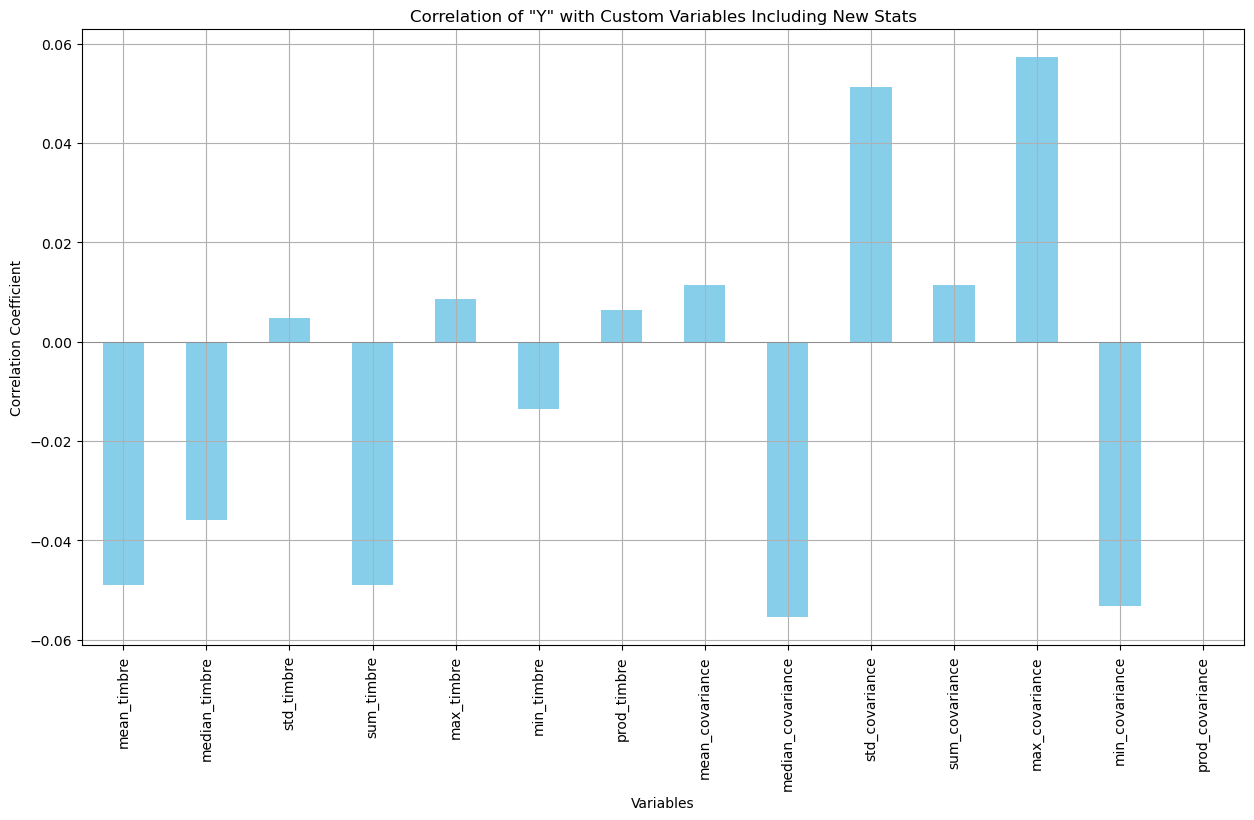

In [16]:
import matplotlib.pyplot as plt
def plot_corr(data):
    correlation_matrix = data.corr()
    custom_vars = [
        'mean_timbre', 'median_timbre', 'std_timbre', 'sum_timbre', 'max_timbre', 'min_timbre', 'prod_timbre',
        'mean_covariance', 'median_covariance', 'std_covariance', 'sum_covariance', 'max_covariance', 'min_covariance', 'prod_covariance'
    ]
    correlation_with_y_custom = correlation_matrix['Y'][custom_vars]
    plt.figure(figsize=(15, 8))  
    correlation_with_y_custom.plot(kind='bar', color='skyblue')
    plt.title('Correlation of "Y" with Custom Variables Including New Stats')
    plt.xlabel('Variables')
    plt.ylabel('Correlation Coefficient')
    plt.grid(True)
    plt.axhline(0, color='gray', linewidth=0.5) 
    plt.show()
plot_corr(train_data)

Si bien se han creado estas características, luego de haber analizado los datos se optó por considerar todas las variables V1 a V90 + variables creadas y sobre estas determinar aquellas en un umbral de correlación con "Y" y evitar la multiconilealidad.



#### Variables V1 a V90 + variables creadas y sobre estas determinar aquellas en un umbral de correlación con "Y"

In [17]:
correlation_matrix = train_data.corr()
target_correlation = correlation_matrix['Y'].sort_values(ascending=False)
correlation_matrix = train_data.corr()
target_correlation = correlation_matrix['Y'].sort_values(ascending=False)
important_features = target_correlation[abs(target_correlation) > 0.015]
high_corr_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in high_corr_matrix.columns if any(high_corr_matrix[column] > 0.8)]
selected_features = important_features.index.difference(to_drop)
selected_features
selected_features2 = selected_features.difference(['Y'])
selected_features2
train_data = train_data[selected_features]
test_data = test_data[selected_features2]
train_data.drop(columns=['ID'], inplace=True, errors='ignore')
test_data.drop(columns=['ID'], inplace=True, errors='ignore')

In [18]:
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Y']), train_data['Y'], test_size=0.20, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## <span style="color:dodgerblue"> **PARTE 3: ANÁLISIS PRELIMINAR DE SELECCIÓN DE MODELOS RELEVANTES**<br></span>

### <span style="color:dodgerblue"> **Modelo 1: Una sola neurona **<br></span>

In [21]:
model1 = Sequential([
    Dense(1, input_dim=X_train_scaled.shape[1], activation='linear')
])
optimizer = Adam(learning_rate=0.2)
model1.compile(optimizer=optimizer, loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model1.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])
y_pred = model1.predict(X_val_scaled)
if np.isnan(y_pred).any():
    raise ValueError("Las predicciones contienen NaN")
rmse = sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')

Epoch 1/10
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 2s 640us/step - loss: 3646274.7500 - val_loss: 2653277.7500
Epoch 2/10
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - loss: 2378656.0000 - val_loss: 1631743.1250
Epoch 3/10
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - loss: 1429066.5000 - val_loss: 888608.5000
Epoch 4/10
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - loss: 748726.3125 - val_loss: 392420.5625
Epoch 5/10
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - loss: 309997.9375 - val_loss: 116953.0547
Epoch 6/10
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - loss: 81577.9453 - val_loss: 14191.3877
Epoch 7/10
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - loss: 7712.5869 - val_loss: 218.8185
Epoch 8/10
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - loss: 135.9781 - val_loss: 102.4660
Epoch 9/10
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - loss: 95.4779 - val_loss: 97.0490
Epoch 10/10
1945/1945 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - loss: 102.8793 - val_loss: 108.8134
Restoring model weigh

### <span style="color:dodgerblue"> **Modelo 2: Múltiples Capas **<br></span>

In [76]:
model2 = Sequential([
    Dense(200, input_dim=X_train_scaled.shape[1], activation='relu'), 
    Dense(50, activation='relu'),  
    Dense(1, activation='linear')  
])

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

model2.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

y_pred = model2.predict(X_val_scaled)
if np.isnan(y_pred).any():
    raise ValueError("Las predicciones contienen NaN")

rmse = sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')


Epoch 1/10


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 754us/step - loss: 1203407.5000 - val_loss: 51299.4648
Epoch 2/10
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 37058.0742 - val_loss: 11845.1768
Epoch 3/10
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 719us/step - loss: 7206.3481 - val_loss: 1883.6832
Epoch 4/10
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - loss: 1215.3699 - val_loss: 666.9042
Epoch 5/10
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 737us/step - loss: 395.8275 - val_loss: 492.5071
Epoch 6/10
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 725us/step - loss: 283.0558 - val_loss: 659.5401
Epoch 7/10
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - loss: 341.4096 - val_loss: 618.0717
Epoch 8/10
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 727us/step - loss: 418.1860 - val_loss: 289.3042
Epoch 9/10
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - loss: 258.7532 - val_loss: 192.1150
Epoch 10/10
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 721us/step - loss: 308.6641 - val_loss: 233.8360
Restoring model weights from the end of the best epoch: 9

## <span style="color:dodgerblue"> **PARTE 4: DESARROLLO Y CALIBRACIÓN DE MODELOS**<br></span>

### <span style="color:dodgerblue"> **Calibración del MODELO 1**<br></span>

Entrenando modelo con learning rate: 0.05
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
Entrenando modelo con learning rate: 0.1


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
Entrenando modelo con learning rate: 0.2


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
Entrenando modelo con learning rate: 0.3


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
Entrenando modelo con learning rate: 0.4


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step


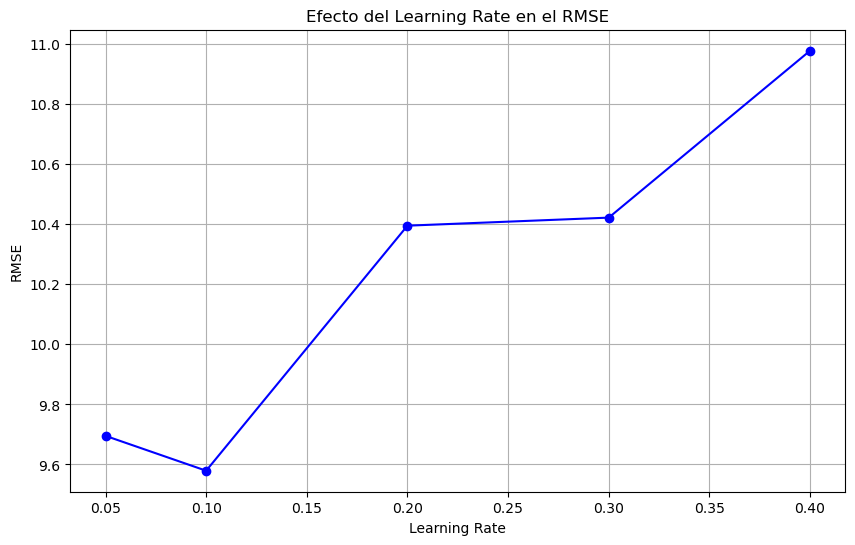

In [80]:
learning_rates = [0.05, 0.1, 0.2, 0.3, 0.4]
rmse_results = []
for lr in learning_rates:
    print(f"Entrenando modelo con learning rate: {lr}")
    model1 = Sequential([
        Dense(1, input_dim=X_train_scaled.shape[1], activation='linear')
    ])
    model1.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
    model1.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=0)
    y_pred = model1.predict(X_val_scaled)
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    rmse_results.append(rmse)   
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, rmse_results, marker='o', linestyle='-', color='b')
plt.title('Efecto del Learning Rate en el RMSE')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [81]:
# Modelo 1: Simplificado con una sola neurona
model1 = Sequential([
    Dense(1, input_dim=X_train_scaled.shape[1], activation='linear')  # Una sola salida para regresión
])

optimizer = Adam(learning_rate=0.1)
model1.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

model1.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

y_pred = model.predict(X_val_scaled)
if np.isnan(y_pred).any():
    raise ValueError("Las predicciones contienen NaN")

rmse = sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')

Epoch 1/30


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - loss: 3810542.0000 - val_loss: 3240118.2500
Epoch 2/30
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - loss: 3066334.0000 - val_loss: 2568705.5000
Epoch 3/30
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - loss: 2417538.2500 - val_loss: 1984019.5000
Epoch 4/30
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - loss: 1851843.3750 - val_loss: 1477541.6250
Epoch 5/30
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - loss: 1366375.1250 - val_loss: 1051049.1250
Epoch 6/30
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - loss: 959021.3750 - val_loss: 702185.1250
Epoch 7/30
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - loss: 628711.5000 - val_loss: 428356.0000
Epoch 8/30
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - loss: 373333.7812 - val_loss: 227648.3594
Epoch 9/30
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - loss: 190133.9844 - val_loss: 95701.8125
Epoch 10/30
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - loss: 74374.0547 - val_loss: 25593.1875
Epo

### <span style="color:dodgerblue"> **Calibración del MODELO 2**<br></span>

Entrenando modelo con learning rate: 0.0005


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
RMSE para learning rate 0.0005: 14.380555208303235
Entrenando modelo con learning rate: 0.0007


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 9.
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
RMSE para learning rate 0.0007: 13.210664354058999
Entrenando modelo con learning rate: 0.001


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 9.
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
RMSE para learning rate 0.001: 13.091129184884839
Entrenando modelo con learning rate: 0.0015


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 10.
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
RMSE para learning rate 0.0015: 14.461828010935946
Entrenando modelo con learning rate: 0.002


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Restoring model weights from the end of the best epoch: 9.
365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
RMSE para learning rate 0.002: 14.258870009321425


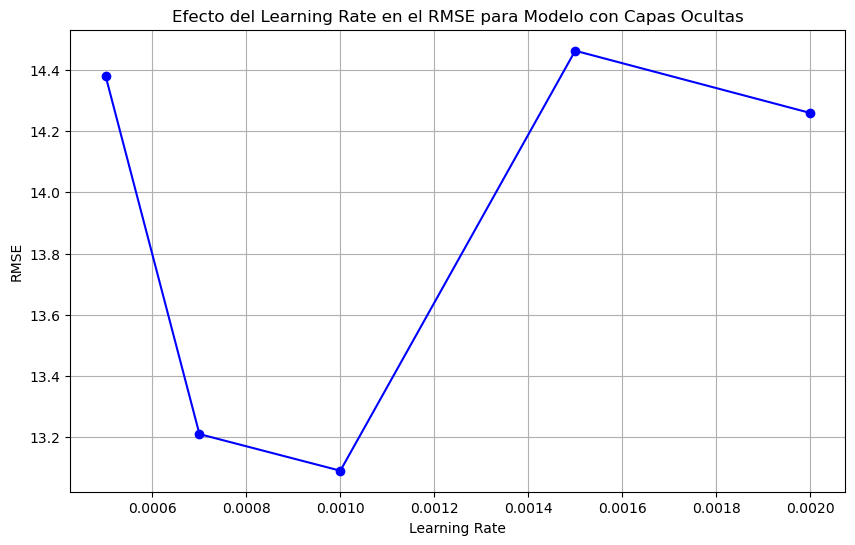

In [86]:
learning_rates = [0.0005, 0.0007, 0.001,0.0015,0.0020]
rmse_results = []

for lr in learning_rates:
    print(f"Entrenando modelo con learning rate: {lr}")
    # Definir el modelo
    model2 = Sequential([
        Dense(200, input_dim=X_train_scaled.shape[1], activation='relu'),  # Capa oculta con 200 neuronas
        Dense(50, activation='relu'),  # Segunda capa oculta con 50 neuronas
        Dense(1, activation='linear')  # Capa de salida para regresión
    ])

    optimizer = Adam(learning_rate=lr)
    model2.compile(optimizer=optimizer, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

    model2.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=0)

    y_pred = model2.predict(X_val_scaled)
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    rmse_results.append(rmse)
    print(f"RMSE para learning rate {lr}: {rmse}")

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, rmse_results, marker='o', linestyle='-', color='b')
plt.title('Efecto del Learning Rate en el RMSE para Modelo con Capas Ocultas')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


Aquí podemos apreciar que el mejor learning rate es el de 0.0010. Ahora se buscó los parámetros óptimos.

In [91]:
num_layers_options = [4,5,6,7]  # Número de capas ocultas a probar
neurons_options = [80]  # Número de neuronas por capa a probar
learning_rate = 0.001  # Puedes ajustar esto según lo que descubras sobre el learning rate
results = []

# Bucle de prueba
for num_layers in num_layers_options:
    for neurons in neurons_options:
        print(f"Probando modelo con {num_layers} capas y {neurons} neuronas por capa")
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu'))
        for _ in range(1, num_layers):
            model.add(Dense(neurons, activation='relu'))
        model.add(Dense(1, activation='linear'))

        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='mean_squared_error')
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
        model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=1)

        y_pred = model.predict(X_val_scaled)
        rmse = sqrt(mean_squared_error(y_val, y_pred))
        results.append((num_layers, neurons, rmse))
        print(f"RMSE: {rmse}")
best_result = min(results, key=lambda x: x[2])  # Encuentra el resultado con el menor RMSE
print(f"Mejor configuración: {best_result[0]} capas, {best_result[1]} neuronas por capa, RMSE: {best_result[2]}")


Probando modelo con 4 capas y 80 neuronas por capa
Epoch 1/50


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 841us/step - loss: 623335.7500 - val_loss: 16345.0645
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - loss: 9658.0645 - val_loss: 1906.3290
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - loss: 1263.1199 - val_loss: 1613.7130
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - loss: 566.8799 - val_loss: 622.2256
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - loss: 493.1807 - val_loss: 234.8601
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 802us/step - loss: 360.9139 - val_loss: 548.6903
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - loss: 244.8782 - val_loss: 295.9596
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - loss: 294.7706 - val_loss: 561.5548
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - loss: 268.4504 - val_loss: 391.1486
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - loss: 218.4442 - val_loss: 804.0892
Epoch 10: early stopping
Restoring model weights from the end

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 890us/step - loss: 548574.0625 - val_loss: 8063.6172
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - loss: 4214.5610 - val_loss: 477.4515
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - loss: 365.3521 - val_loss: 162.4477
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 843us/step - loss: 201.1934 - val_loss: 295.0901
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - loss: 206.1693 - val_loss: 380.6755
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 847us/step - loss: 177.4323 - val_loss: 291.1519
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - loss: 167.7549 - val_loss: 114.1400
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - loss: 162.6177 - val_loss: 94.5485
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - loss: 195.3099 - val_loss: 113.2370
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - loss: 150.2335 - val_loss: 97.4512
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - loss: 13

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 963us/step - loss: 485874.4375 - val_loss: 1908.9171
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - loss: 711.6522 - val_loss: 267.3050
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - loss: 254.8693 - val_loss: 292.3640
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - loss: 249.8018 - val_loss: 182.6383
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - loss: 249.0771 - val_loss: 123.2557
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - loss: 278.9521 - val_loss: 385.2135
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - loss: 223.2645 - val_loss: 110.5283
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - loss: 187.3097 - val_loss: 114.2166
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 168.4311 - val_loss: 103.1124
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 161.8787 - val_loss: 395.8438
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 185.035

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 503434.6250 - val_loss: 13270.3594
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - loss: 2075.5789 - val_loss: 645.2061
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - loss: 345.2095 - val_loss: 1037.0529
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - loss: 380.1412 - val_loss: 188.7197
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - loss: 247.5056 - val_loss: 2354.7800
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 492.2464 - val_loss: 214.5802
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 215.0701 - val_loss: 111.4007
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - loss: 460.9893 - val_loss: 205.4947
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - loss: 178.9350 - val_loss: 99.0198
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - loss: 154.0790 - val_loss: 1569.2368
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - loss: 327

Como podemos obsersar, la mejor configuración fue de 5 capas, procedemos ahora a determinar el número idóneo de neuronas de las 5 capas.

In [97]:
# Configuraciones de neuronas para cada modelo
configurations = {
    'Config 1': [160, 80, 45, 25, 20],  # Configuración original
    'Config 2': [165, 80, 45, 25, 20],  # Ligeramente más grande
    'Config 3': [170, 80, 45, 25, 20],   # Ligeramente más pequeño
    'Config 4': [175, 80, 45, 25, 20],  # Configuración original
    'Config 5': [180, 80, 45, 25, 20],  # Ligeramente más grande
    'Config 6': [160, 85, 45, 25, 20],   # Ligeramente más pequeño
    'Config 7': [160, 75, 45, 25, 20],  # Configuración original
    'Config 8': [160, 70, 45, 25, 20],  # Ligeramente más grande
    'Config 9': [160, 80, 45, 20, 20],   # Ligeramente más pequeño
    'Config 10': [160, 80, 45, 20, 15],  # Configuración original
    'Config 11': [160, 80, 45, 25, 10],  # Ligeramente más grande
    'Config 12': [160, 90, 45, 25, 20]   # Ligeramente más pequeño    
}

learning_rate = 0.001
results = []

# Pruebas de cada configuración
for config_name, layers in configurations.items():
    print(f"Probando modelo {config_name} con configuración de capas: {layers}")
    model = Sequential()
    model.add(Dense(layers[0], input_dim=X_train_scaled.shape[1], activation='elu'))
    model.add(BatchNormalization())
    
    for neurons in layers[1:-1]:
        model.add(Dense(neurons, activation='elu'))
        model.add(BatchNormalization())
    
    # Última capa antes de la salida
    model.add(Dense(layers[-1], activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(1, activation='linear'))  # Salida para regresión

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=1)

    y_pred = model.predict(X_val_scaled)
    if np.isnan(y_pred).any():
        raise ValueError("Las predicciones contienen NaN")
    
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    results.append((config_name, layers, rmse))
    print(f"RMSE para {config_name}: {rmse}")

# Encontrar la mejor configuración
best_result = min(results, key=lambda x: x[2])
print(f"Mejor configuración: {best_result[0]} con capas {best_result[1]}, RMSE: {best_result[2]}")



Probando modelo Config 1 con configuración de capas: [160, 80, 45, 25, 20]
Epoch 1/50


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3912462.5000 - val_loss: 3265402.2500
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2932283.2500 - val_loss: 1880811.2500
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1548161.1250 - val_loss: 674911.6250
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 477863.4062 - val_loss: 83012.0312
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 42974.5469 - val_loss: 442.5907
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 177.2345 - val_loss: 75.8602
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 77.6525 - val_loss: 74.2561
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.0015 - val_loss: 74.3253
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.6802 - val_loss: 75.2915
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 73.1237 - val_loss: 72.8357
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 72.531

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3912279.0000 - val_loss: 3264433.7500
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2931270.2500 - val_loss: 1878855.7500
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1547374.5000 - val_loss: 672785.7500
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 477342.9062 - val_loss: 83262.2656
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 42846.0312 - val_loss: 412.7495
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 176.5738 - val_loss: 75.5873
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.2525 - val_loss: 75.0805
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 75.2326 - val_loss: 75.0863
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 75.0185 - val_loss: 73.0316
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.7400 - val_loss: 74.1770
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 72.908

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3912407.5000 - val_loss: 3267195.5000
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2932019.0000 - val_loss: 1881951.8750
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1548229.7500 - val_loss: 674979.4375
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 478004.1562 - val_loss: 82678.3281
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 42955.6328 - val_loss: 437.6429
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 178.1984 - val_loss: 77.7799
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 77.4643 - val_loss: 75.3918
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 75.7758 - val_loss: 74.9862
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.8498 - val_loss: 74.7897
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 75.5195 - val_loss: 75.2973
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 73.808

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3911886.5000 - val_loss: 3265891.7500
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2930909.7500 - val_loss: 1878738.8750
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1546681.7500 - val_loss: 672259.2500
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 477112.5312 - val_loss: 82421.4609
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 42790.9883 - val_loss: 415.6550
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 178.3197 - val_loss: 77.2563
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.3509 - val_loss: 75.4396
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 75.3064 - val_loss: 74.1882
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 75.1350 - val_loss: 75.8422
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.2847 - val_loss: 75.4904
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 73.390

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3912378.0000 - val_loss: 3266827.0000
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2931485.5000 - val_loss: 1880041.1250
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1547145.5000 - val_loss: 673702.1250
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 477327.4375 - val_loss: 82890.0078
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 42834.1758 - val_loss: 424.4898
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 177.9794 - val_loss: 75.4147
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.9908 - val_loss: 75.0328
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.1505 - val_loss: 74.8809
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 75.3257 - val_loss: 76.1492
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 75.1500 - val_loss: 74.3463
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 73.059

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 3912759.2500 - val_loss: 3265671.2500
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2932194.0000 - val_loss: 1882434.5000
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1548331.5000 - val_loss: 675214.8750
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 478009.2812 - val_loss: 82959.9062
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 43020.4727 - val_loss: 390.0714
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 178.6683 - val_loss: 79.1867
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.9707 - val_loss: 75.2506
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.9515 - val_loss: 76.5256
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.7665 - val_loss: 73.5221
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.5444 - val_loss: 73.9929
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 75.088

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3913373.2500 - val_loss: 3267274.5000
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2934172.5000 - val_loss: 1883674.8750
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1550229.8750 - val_loss: 676009.3125
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 479232.2500 - val_loss: 83260.6562
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 43272.9062 - val_loss: 451.1838
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 181.5897 - val_loss: 75.9589
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 77.2374 - val_loss: 75.3956
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 75.6566 - val_loss: 74.5258
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.9523 - val_loss: 74.6482
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.9397 - val_loss: 78.6770
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 72.911

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3912217.0000 - val_loss: 3264677.2500
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2931675.5000 - val_loss: 1879912.8750
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1547772.7500 - val_loss: 672911.5000
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 477716.8438 - val_loss: 82617.3438
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 42919.7539 - val_loss: 409.3922
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 179.8839 - val_loss: 76.7306
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 77.2561 - val_loss: 75.6486
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.0854 - val_loss: 75.3376
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.5225 - val_loss: 76.1459
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.0186 - val_loss: 73.9786
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 73.503

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3912383.0000 - val_loss: 3263975.2500
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2931334.5000 - val_loss: 1881092.0000
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1547236.2500 - val_loss: 673397.1875
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 477368.7188 - val_loss: 82589.7656
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 42847.6992 - val_loss: 430.2831
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 178.0779 - val_loss: 74.4100
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.7674 - val_loss: 76.2123
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.1731 - val_loss: 76.5797
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.7144 - val_loss: 75.4294
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.5630 - val_loss: 77.2682
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 72.531

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3934138.2500 - val_loss: 3433775.7500
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3169076.5000 - val_loss: 2300994.5000
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2000855.6250 - val_loss: 1148914.8750
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 914268.8750 - val_loss: 336810.6250
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 225398.5938 - val_loss: 25648.9395
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 11954.9570 - val_loss: 99.8961
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 83.8340 - val_loss: 75.1659
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.2158 - val_loss: 74.4442
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.1963 - val_loss: 75.4847
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.1665 - val_loss: 75.5732
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss:

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3957114.7500 - val_loss: 3613797.2500
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3425652.7500 - val_loss: 2788049.7500
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2551924.7500 - val_loss: 1833951.1250
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1603427.5000 - val_loss: 955176.0625
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 776441.3125 - val_loss: 325739.7812
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 230688.2344 - val_loss: 41211.6758
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 21774.5781 - val_loss: 309.2372
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 148.9528 - val_loss: 75.7607
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 74.2084 - val_loss: 73.4192
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 72.2481 - val_loss: 76.8130
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/s

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2066/2066 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3912180.0000 - val_loss: 3263889.2500
Epoch 2/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2930331.2500 - val_loss: 1878009.0000
Epoch 3/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1546289.3750 - val_loss: 671782.6875
Epoch 4/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 476710.9375 - val_loss: 82616.1094
Epoch 5/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 42734.1367 - val_loss: 433.1719
Epoch 6/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 176.4547 - val_loss: 78.1944
Epoch 7/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 77.4505 - val_loss: 75.7742
Epoch 8/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 76.6448 - val_loss: 74.6988
Epoch 9/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 75.8441 - val_loss: 73.8094
Epoch 10/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 73.6373 - val_loss: 75.6495
Epoch 11/50
2066/2066 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.621

In [22]:
# Configuraciones de neuronas para cada modelo
configurations = {
    'Config 1': [360, 180, 60, 25, 20],  # Configuración original
    'Config 2': [365, 180, 60, 25, 20],  # Ligeramente más grande
    'Config 3': [370, 180, 60, 25, 20],   # Ligeramente más pequeño
    'Config 4': [360, 180, 60, 25, 25],  # Configuración original
    'Config 5': [365, 180, 60, 30, 20],  # Ligeramente más grande
    'Config 6': [370, 180, 60, 30, 15],   # Ligeramente más pequeño
    'Config 7': [360, 180, 60, 30, 15],  # Configuración original
    'Config 8': [365, 185, 60, 25, 20],  # Ligeramente más grande
    'Config 9': [370, 185, 90, 25, 20],   # Ligeramente más pequeño
    'Config 10': [380, 180, 60, 30, 20],  # Configuración original
    'Config 11': [400, 250, 125, 25, 20],  # Ligeramente más grande
    'Config 12': [400, 200, 100, 50, 25],   # Ligeramente más pequeño
}

learning_rate = 0.001
results = []

# Pruebas de cada configuración
for config_name, layers in configurations.items():
    print(f"Probando modelo {config_name} con configuración de capas: {layers}")
    model = Sequential()
    model.add(Dense(layers[0], input_dim=X_train_scaled.shape[1], activation='elu'))
    model.add(BatchNormalization())
    
    for neurons in layers[1:-1]:
        model.add(Dense(neurons, activation='elu'))
        model.add(BatchNormalization())
    
    # Última capa antes de la salida
    model.add(Dense(layers[-1], activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(1, activation='linear'))  # Salida para regresión

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=34, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=1)

    y_pred = model.predict(X_val_scaled)
    if np.isnan(y_pred).any():
        raise ValueError("Las predicciones contienen NaN")
    
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    results.append((config_name, layers, rmse))
    print(f"RMSE para {config_name}: {rmse}")

# Encontrar la mejor configuración actualcorriendo
best_result = min(results, key=lambda x: x[2])
print(f"Mejor configuración: {best_result[0]} con capas {best_result[1]}, RMSE: {best_result[2]}")


Probando modelo Config 1 con configuración de capas: [360, 180, 60, 25, 20]
Epoch 1/100


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3930145.0000 - val_loss: 3397954.5000
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3117301.5000 - val_loss: 2198668.7500
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1889643.3750 - val_loss: 1027628.0625
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 800523.6250 - val_loss: 263721.9688
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 170574.8750 - val_loss: 15359.7061
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6828.4902 - val_loss: 91.2023
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 80.3553 - val_loss: 76.9316
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 76.4306 - val_loss: 77.2292
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 78.4619 - val_loss: 75.6307
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 73.3476 - val_loss: 78.7024
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/ste

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3929671.0000 - val_loss: 3396719.5000
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3114829.7500 - val_loss: 2195164.7500
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1887232.0000 - val_loss: 1025829.5625
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 798454.5625 - val_loss: 263626.5625
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 169769.7656 - val_loss: 15212.5273
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6773.5981 - val_loss: 92.9771
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 80.0089 - val_loss: 77.4103
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75.3711 - val_loss: 75.5953
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75.8688 - val_loss: 75.8362
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.8552 - val_loss: 73.8806
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/ste

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3930817.0000 - val_loss: 3401471.5000
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3117697.7500 - val_loss: 2199168.2500
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1890110.8750 - val_loss: 1028069.5625
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 800867.0625 - val_loss: 265058.6562
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 170786.6719 - val_loss: 15239.3730
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6873.3472 - val_loss: 89.1753
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 80.9247 - val_loss: 78.2257
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 78.7136 - val_loss: 76.0915
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75.9485 - val_loss: 77.3592
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.9293 - val_loss: 76.5857
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/ste

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3912775.5000 - val_loss: 3263996.2500
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2927510.2500 - val_loss: 1866743.1250
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1534297.3750 - val_loss: 665955.3750
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 473575.9375 - val_loss: 86352.2266
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 45930.8945 - val_loss: 673.6136
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 280.7649 - val_loss: 76.8504
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 78.0307 - val_loss: 77.2019
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 77.8965 - val_loss: 76.4053
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 76.1387 - val_loss: 76.0152
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.9351 - val_loss: 75.6620
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - lo

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3930396.5000 - val_loss: 3402735.7500
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3118905.7500 - val_loss: 2202060.0000
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1891341.7500 - val_loss: 1028392.8125
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 801833.6875 - val_loss: 265163.4062
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 171138.1719 - val_loss: 15330.3291
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6904.2734 - val_loss: 85.2433
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 78.4618 - val_loss: 75.6469
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.7354 - val_loss: 76.8719
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.3756 - val_loss: 75.9175
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 72.6827 - val_loss: 75.9413
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/ste

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3949396.0000 - val_loss: 3540622.5000
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3321865.0000 - val_loss: 2577874.2500
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2310938.5000 - val_loss: 1521823.6250
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1284747.1250 - val_loss: 650404.2500
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 494859.6562 - val_loss: 144798.7344
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 90182.2344 - val_loss: 6026.7710
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2583.4346 - val_loss: 80.4639
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 76.6812 - val_loss: 79.0881
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75.2464 - val_loss: 76.6202
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.5328 - val_loss: 75.1919
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3948357.7500 - val_loss: 3540931.7500
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3318431.2500 - val_loss: 2572931.5000
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2306920.0000 - val_loss: 1518471.7500
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1280691.6250 - val_loss: 647196.8750
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 492434.9688 - val_loss: 143201.7812
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 89196.6719 - val_loss: 5888.4629
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2509.5322 - val_loss: 81.9399
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 77.2131 - val_loss: 76.8024
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75.0145 - val_loss: 76.5412
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.0088 - val_loss: 76.0781
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3931086.7500 - val_loss: 3399828.5000
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3117510.7500 - val_loss: 2198505.5000
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1889906.5000 - val_loss: 1028580.6875
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 800674.7500 - val_loss: 264436.5000
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 170694.9844 - val_loss: 15369.3672
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6848.7544 - val_loss: 86.3976
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 79.7790 - val_loss: 76.7406
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75.3181 - val_loss: 76.8144
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.6550 - val_loss: 81.8808
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.2779 - val_loss: 76.9990
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/ste

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3930681.2500 - val_loss: 3400259.0000
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3118476.0000 - val_loss: 2201380.5000
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1891234.0000 - val_loss: 1027757.5625
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 801693.5625 - val_loss: 265242.5938
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 171109.2031 - val_loss: 15307.5566
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6886.2725 - val_loss: 88.0894
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 79.9351 - val_loss: 76.4399
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 76.8393 - val_loss: 75.1949
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.9081 - val_loss: 75.6041
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.3948 - val_loss: 74.7191
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/ste

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3930743.2500 - val_loss: 3400553.2500
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3117253.5000 - val_loss: 2197695.0000
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1889644.2500 - val_loss: 1027253.4375
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 800381.3125 - val_loss: 263772.9375
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 170572.4844 - val_loss: 15318.4219
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6833.3608 - val_loss: 90.6883
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 79.7963 - val_loss: 75.7534
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75.7703 - val_loss: 75.9228
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 76.9586 - val_loss: 76.1097
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 73.3617 - val_loss: 76.1555
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/ste

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3930781.0000 - val_loss: 3401146.2500
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3118092.7500 - val_loss: 2200926.0000
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1890761.5000 - val_loss: 1026547.5625
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 801248.0000 - val_loss: 264797.2812
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 170829.2812 - val_loss: 15184.6836
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6878.9126 - val_loss: 82.2800
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 80.1811 - val_loss: 77.2359
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 77.4426 - val_loss: 76.9225
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 74.8014 - val_loss: 75.5350
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 74.8320 - val_loss: 75.1886
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/ste

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3912994.5000 - val_loss: 3262871.2500
Epoch 2/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2926421.7500 - val_loss: 1865968.6250
Epoch 3/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1533265.3750 - val_loss: 665354.6250
Epoch 4/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 473048.3750 - val_loss: 86060.6094
Epoch 5/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 45785.8789 - val_loss: 687.1929
Epoch 6/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 274.3164 - val_loss: 78.2311
Epoch 7/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 77.0398 - val_loss: 76.7458
Epoch 8/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 76.3499 - val_loss: 80.1258
Epoch 9/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 76.4243 - val_loss: 76.9174
Epoch 10/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.4458 - val_loss: 75.4406
Epoch 11/100
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - lo

In [23]:
# Configuraciones de neuronas para cada modelo
configurations = {
    'Config 1': [360, 180, 65, 25, 20],  # Configuración ideal
    'Config 2': [720, 360, 180, 60, 25, 15],  # Ligeramente 2
    'Config 3': [720, 300, 150, 50, 25, 20],  # Configuración original
    'Config 4': [360, 180, 100, 50, 25, 20],  # Ligeramente más grande
    'Config 5': [360, 180, 90, 45, 30, 25],  # Configuración original
    'Config 6': [720, 360, 180, 60, 25, 20],  # Configuración original
    'Config 7': [360, 180, 60, 30, 20],  # Configuración original
    'Config 8': [360, 180, 60, 25, 20],  # Ligeramente más grande
}

learning_rate = 0.001
results = []

# Pruebas de cada configuración
for config_name, layers in configurations.items():
    print(f"Probando modelo {config_name} con configuración de capas: {layers}")
    model = Sequential()
    model.add(Dense(layers[0], input_dim=X_train_scaled.shape[1], activation='elu'))
    model.add(BatchNormalization())
    
    for neurons in layers[1:-1]:
        model.add(Dense(neurons, activation='elu'))
        model.add(BatchNormalization())
    
    # Última capa antes de la salida
    model.add(Dense(layers[-1], activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(1, activation='linear'))  # Salida para regresión

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
    model.fit(X_train_scaled, y_train, epochs=30, batch_size=34, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=1)

    y_pred = model.predict(X_val_scaled)
    if np.isnan(y_pred).any():
        raise ValueError("Las predicciones contienen NaN")
    
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    results.append((config_name, layers, rmse))
    print(f"RMSE para {config_name}: {rmse}")

# Encontrar la mejor configuración actualcorriendo
best_result = min(results, key=lambda x: x[2])
print(f"Mejor configuración: {best_result[0]} con capas {best_result[1]}, RMSE: {best_result[2]}")

Probando modelo Config 1 con configuración de capas: [360, 180, 65, 25, 20]
Epoch 1/30


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3931060.5000 - val_loss: 3401027.2500
Epoch 2/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3119885.0000 - val_loss: 2202066.2500
Epoch 3/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1892891.1250 - val_loss: 1030716.0625
Epoch 4/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 803019.9375 - val_loss: 265482.5625
Epoch 5/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 171616.1875 - val_loss: 15504.4258
Epoch 6/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6927.9819 - val_loss: 93.7069
Epoch 7/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 79.2728 - val_loss: 75.5837
Epoch 8/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 77.6765 - val_loss: 75.5291
Epoch 9/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75.0883 - val_loss: 75.1749
Epoch 10/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 73.8048 - val_loss: 74.9947
Epoch 11/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 3949616.2500 - val_loss: 3546478.7500
Epoch 2/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3322319.5000 - val_loss: 2578691.5000
Epoch 3/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2312042.2500 - val_loss: 1522796.1250
Epoch 4/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1285502.0000 - val_loss: 651886.9375
Epoch 5/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 495579.0000 - val_loss: 145127.8438
Epoch 6/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 90387.3125 - val_loss: 6038.8188
Epoch 7/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2594.6140 - val_loss: 78.6553
Epoch 8/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 77.1439 - val_loss: 76.6447
Epoch 9/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 76.2705 - val_loss: 76.3258
Epoch 10/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 76.5481 - val_loss: 76.9654
Epoch 11/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step -

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3930963.2500 - val_loss: 3400794.2500
Epoch 2/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3118052.0000 - val_loss: 2199543.2500
Epoch 3/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1890834.1250 - val_loss: 1027060.0000
Epoch 4/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 801312.9375 - val_loss: 263556.2500
Epoch 5/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 170916.0938 - val_loss: 15198.0332
Epoch 6/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6872.8193 - val_loss: 90.1182
Epoch 7/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 80.2635 - val_loss: 78.5670
Epoch 8/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 78.6632 - val_loss: 77.6098
Epoch 9/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 77.0344 - val_loss: 75.6152
Epoch 10/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 75.6672 - val_loss: 75.2983
Epoch 11/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3929806.5000 - val_loss: 3400259.5000
Epoch 2/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3116058.7500 - val_loss: 2197777.0000
Epoch 3/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1888357.7500 - val_loss: 1027395.6250
Epoch 4/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 799225.5000 - val_loss: 263703.9375
Epoch 5/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 170132.1250 - val_loss: 15024.1514
Epoch 6/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6820.6763 - val_loss: 91.5482
Epoch 7/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 80.5271 - val_loss: 79.0128
Epoch 8/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 77.1308 - val_loss: 75.9368
Epoch 9/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 76.7245 - val_loss: 75.8570
Epoch 10/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 74.7075 - val_loss: 78.4214
Epoch 11/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3914396.7500 - val_loss: 3269619.2500
Epoch 2/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2930528.5000 - val_loss: 1871992.5000
Epoch 3/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1537442.3750 - val_loss: 669461.8125
Epoch 4/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 475533.7188 - val_loss: 86886.6250
Epoch 5/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 46345.0938 - val_loss: 712.5532
Epoch 6/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 283.8465 - val_loss: 77.7531
Epoch 7/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 78.5845 - val_loss: 76.8999
Epoch 8/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 77.3758 - val_loss: 78.3423
Epoch 9/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 78.1515 - val_loss: 77.1254
Epoch 10/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 76.7574 - val_loss: 76.4551
Epoch 11/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 76.024

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 3931416.0000 - val_loss: 3402125.0000
Epoch 2/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3120535.0000 - val_loss: 2205098.5000
Epoch 3/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1893560.2500 - val_loss: 1031266.1250
Epoch 4/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 803553.1875 - val_loss: 265872.5938
Epoch 5/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 171910.6562 - val_loss: 15386.4697
Epoch 6/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6958.5464 - val_loss: 89.8036
Epoch 7/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 83.6337 - val_loss: 76.5256
Epoch 8/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 78.5268 - val_loss: 76.0615
Epoch 9/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 77.6662 - val_loss: 77.6453
Epoch 10/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 76.5179 - val_loss: 76.2415
Epoch 11/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3931078.2500 - val_loss: 3402340.0000
Epoch 2/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3119225.2500 - val_loss: 2200452.5000
Epoch 3/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1891764.2500 - val_loss: 1029616.4375
Epoch 4/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 802155.7500 - val_loss: 265285.4375
Epoch 5/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 171284.3594 - val_loss: 15321.6084
Epoch 6/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6908.1572 - val_loss: 86.2400
Epoch 7/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 79.4978 - val_loss: 77.2234
Epoch 8/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75.2652 - val_loss: 78.2353
Epoch 9/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 73.4480 - val_loss: 74.7704
Epoch 10/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 74.2803 - val_loss: 76.3158
Epoch 11/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1831/1831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3930700.2500 - val_loss: 3402719.5000
Epoch 2/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3118369.5000 - val_loss: 2197948.7500
Epoch 3/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1891355.2500 - val_loss: 1028410.0000
Epoch 4/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 801742.0000 - val_loss: 264788.6250
Epoch 5/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 171084.1250 - val_loss: 15364.4629
Epoch 6/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6874.8047 - val_loss: 85.4089
Epoch 7/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 79.3965 - val_loss: 77.0385
Epoch 8/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75.7633 - val_loss: 75.1299
Epoch 9/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75.4087 - val_loss: 75.1995
Epoch 10/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 73.3187 - val_loss: 74.9571
Epoch 11/30
1831/1831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 

### <span style="color:dodgerblue"> **Modelo 3 - Multicapa Adam y ajuste Dropout y BatchNormalization**<br></span>

In [27]:
# Modelo modificado
model = Sequential([
    Dense(360, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),  # Agregar dropout para regularización
    BatchNormalization(),
    Dense(180, activation='elu'),
    Dropout(0.2),  # Agregar dropout para regularización8.5862
    BatchNormalization(),
    Dense(60, activation='relu'),
    BatchNormalization(),
    Dense(25, activation='relu'),
    BatchNormalization(),
    Dense(20, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')  # Salida para regresión
])

# Compilación con Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Callback de EarlyStopping modificado
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Entrenamiento con EarlyStopping
model.fit(X_train_scaled, y_train, epochs=50, batch_size=50, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

# Evaluación
y_pred = model.predict(X_val_scaled)
if np.isnan(y_pred).any():
    raise ValueError("Las predicciones contienen NaN")

rmse = sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')


Epoch 1/50


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3970240.2500 - val_loss: 3699251.7500
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3541780.5000 - val_loss: 2994595.2500
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2788382.2500 - val_loss: 2149194.0000
Epoch 4/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1936844.0000 - val_loss: 1327153.1250
Epoch 5/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1146506.2500 - val_loss: 658643.4375
Epoch 6/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 533572.8125 - val_loss: 226655.2656
Epoch 7/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 164331.0312 - val_loss: 38486.3984
Epoch 8/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23016.0469 - val_loss: 1479.3093
Epoch 9/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 720.2602 - val_loss: 77.2922
Epoch 10/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 73.6862 - val_loss: 75.1444
Epoch 11/50
1245/1245 ━━━━━━━━━━━━━━━━━━

In [28]:
test_data2 = pd.read_csv('testReg.csv')
test_ids = test_data2['ID'].copy()
test_data = test_data[selected_features2]

X_test_scaled = scaler.transform(test_data)
predictions = model.predict(X_test_scaled).flatten()

output = pd.DataFrame({'ID': test_ids, 'Y': np.round(predictions).astype(int)})
output.to_csv('predictionsplease29.csv', index=False)
print("Predicciones guardadas en 'predictionsplease29.csv'.")

584/584 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step
Predicciones guardadas en 'predictionsplease29.csv'.


In [29]:
dropout_values = [0.2,0.25,0.3,0.35]
results = []

for dropout_rate in dropout_values:
    print(f"Probando modelo con dropout rate de {dropout_rate}")
    # Configuración del modelo
    model = Sequential([
        Dense(360, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dropout(dropout_rate),  # Aplicar el valor de dropout probado
        BatchNormalization(),
        Dense(180, activation='elu'),
        Dropout(dropout_rate),  # Aplicar el mismo valor aquí también
        BatchNormalization(),
        Dense(60, activation='relu'),
        BatchNormalization(),
        Dense(25, activation='relu'),
        BatchNormalization(),
        Dense(20, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='linear')  # Salida para regresión
    ])

    # Compilación del modelo
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Entrenamiento
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=50, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

    # Evaluación
    y_pred = model.predict(X_val_scaled)
    if np.isnan(y_pred).any():
        raise ValueError("Las predicciones contienen NaN")

    rmse = sqrt(mean_squared_error(y_val, y_pred))
    results.append((dropout_rate, rmse))
    print(f"RMSE para dropout {dropout_rate}: {rmse}")

# Determinar el mejor valor de dropout
best_dropout, best_rmse = min(results, key=lambda x: x[1])
print(f"El mejor valor de dropout es {best_dropout} con un RMSE de {best_rmse}")


Probando modelo con dropout rate de 0.0
Epoch 1/50


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3970396.5000 - val_loss: 3700296.7500
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3542791.0000 - val_loss: 2998190.2500
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2789677.2500 - val_loss: 2149796.0000
Epoch 4/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1937963.8750 - val_loss: 1328910.1250
Epoch 5/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1147370.6250 - val_loss: 659612.0000
Epoch 6/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 534065.3750 - val_loss: 227094.8438
Epoch 7/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 164584.2969 - val_loss: 38714.4141
Epoch 8/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 23092.4707 - val_loss: 1515.3057
Epoch 9/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 713.5310 - val_loss: 76.6366
Epoch 10/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 65.4475 - val_loss: 74.8208
Epoch 11/50
1245/1245 ━━━━━━━━━━━━━━━━━━

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3969704.0000 - val_loss: 3699336.0000
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3540857.2500 - val_loss: 2997155.5000
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2787356.7500 - val_loss: 2146883.5000
Epoch 4/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1935739.3750 - val_loss: 1327027.8750
Epoch 5/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1145387.1250 - val_loss: 658322.5000
Epoch 6/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 532577.5000 - val_loss: 226033.7656
Epoch 7/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 163942.9844 - val_loss: 38214.7734
Epoch 8/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22884.1562 - val_loss: 1521.1646
Epoch 9/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 710.0789 - val_loss: 76.1521
Epoch 10/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 70.8372 - val_loss: 74.0788
Epoch 11/50
1245/1245 ━━━━━━━━━━━━━━━━━━

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3969984.0000 - val_loss: 3701048.2500
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3542280.7500 - val_loss: 2999175.2500
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2789444.2500 - val_loss: 2149204.0000
Epoch 4/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1937610.8750 - val_loss: 1328199.6250
Epoch 5/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1147119.6250 - val_loss: 660007.0625
Epoch 6/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 533844.0625 - val_loss: 226651.1406
Epoch 7/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 164549.9375 - val_loss: 38656.6523
Epoch 8/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23053.6934 - val_loss: 1521.8140
Epoch 9/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 718.8654 - val_loss: 78.2046
Epoch 10/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 73.1738 - val_loss: 78.7410
Epoch 11/50
1245/1245 ━━━━━━━━━━━━━━━━━━

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3970617.0000 - val_loss: 3701317.7500
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3544711.7500 - val_loss: 2999279.7500
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2792412.0000 - val_loss: 2152330.0000
Epoch 4/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1941291.2500 - val_loss: 1329645.0000
Epoch 5/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1150498.0000 - val_loss: 662195.4375
Epoch 6/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 536250.0000 - val_loss: 228875.8125
Epoch 7/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 165787.8906 - val_loss: 38736.4141
Epoch 8/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23362.8516 - val_loss: 1559.8960
Epoch 9/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 735.4720 - val_loss: 76.9649
Epoch 10/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 76.8799 - val_loss: 75.9048
Epoch 11/50
1245/1245 ━━━━━━━━━━━━━━━━━━

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3970413.0000 - val_loss: 3701690.0000
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3544074.0000 - val_loss: 2999543.7500
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2791254.2500 - val_loss: 2152459.2500
Epoch 4/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1939943.7500 - val_loss: 1330610.0000
Epoch 5/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1149166.6250 - val_loss: 661243.3125
Epoch 6/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 535391.1875 - val_loss: 228316.7500
Epoch 7/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 165365.2344 - val_loss: 38514.4180
Epoch 8/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23244.4609 - val_loss: 1584.0935
Epoch 9/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 737.0052 - val_loss: 77.9751
Epoch 10/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 78.0943 - val_loss: 76.7041
Epoch 11/50
1245/1245 ━━━━━━━━━━━━━━━━━━

C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3969482.7500 - val_loss: 3699188.7500
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3539723.0000 - val_loss: 2994684.7500
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2785803.5000 - val_loss: 2145104.7500
Epoch 4/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1933932.7500 - val_loss: 1323559.8750
Epoch 5/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1143839.1250 - val_loss: 656971.6875
Epoch 6/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 531527.2500 - val_loss: 224992.1562
Epoch 7/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 163460.8438 - val_loss: 37976.2812
Epoch 8/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22803.3359 - val_loss: 1504.4817
Epoch 9/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 712.4728 - val_loss: 78.9355
Epoch 10/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 80.1748 - val_loss: 76.7188
Epoch 11/50
1245/1245 ━━━━━━━━━━━━━━━━━━

In [30]:
# Modelo modificado
model = Sequential([
    Dense(360, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),  # Agregar dropout para regularización
    BatchNormalization(),
    Dense(180, activation='elu'),
    Dropout(0.3),  # Agregar dropout para regularización
    BatchNormalization(),
    Dense(60, activation='relu'),
    BatchNormalization(),
    Dense(25, activation='relu'),
    BatchNormalization(),
    Dense(20, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')  # Salida para regresión
])

# Compilación con Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Callback de EarlyStopping modificado
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Entrenamiento con EarlyStopping
model.fit(X_train_scaled, y_train, epochs=50, batch_size=50, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

# Evaluación
y_pred = model.predict(X_val_scaled)
if np.isnan(y_pred).any():
    raise ValueError("Las predicciones contienen NaN")

rmse = sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE: {rmse}')


Epoch 1/50


C:\Users\CHRISTIAN\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3970697.2500 - val_loss: 3701337.5000
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3543237.0000 - val_loss: 2998061.0000
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2790338.0000 - val_loss: 2150833.2500
Epoch 4/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1938963.6250 - val_loss: 1329621.8750
Epoch 5/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1148372.8750 - val_loss: 660871.0625
Epoch 6/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 534867.8125 - val_loss: 227437.1562
Epoch 7/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 165004.4688 - val_loss: 38713.6016
Epoch 8/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23177.8965 - val_loss: 1512.8955
Epoch 9/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 730.8223 - val_loss: 76.4190
Epoch 10/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 76.7771 - val_loss: 75.0950
Epoch 11/50
1245/1245 ━━━━━━━━━━━━━━━━━━

In [31]:
test_data2 = pd.read_csv('testReg.csv')
test_ids = test_data2['ID'].copy()
test_data = test_data[selected_features2]

# Asumiendo que 'scaler' y 'model' ya están definidos y entrenados
X_test_scaled = scaler.transform(test_data)
predictions = model.predict(X_test_scaled).flatten()

# Creación de un DataFrame para guardar las predicciones junto con los IDs 8.67698
output = pd.DataFrame({'ID': test_ids, 'Y': np.round(predictions).astype(int)})
output.to_csv('predictionsplease292.csv', index=False)
print("Predicciones guardadas en 'predictionsplease292.csv'.")

584/584 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
Predicciones guardadas en 'predictionsplease292.csv'.


### <span style="color:dodgerblue"> HITO: 

- RMSE EN LAB LOCAL - 8.41185
- RMSE EN KAGGLE - 8.64070
- RANKING EN EL PUBLIC LEADERBOARD 5 DE 21 EQUIPOS.
- DIFERENCIA CON EL RANKING 1:  8.64070 - 8.4901 = 0.1505
    
    Fuente: Public Leaderboard de Kaggle: https://www.kaggle.com/competitions/music-year-prediction/leaderboard, con información al  29.04.2024 a las 4:15 am.

## <span style="color:dodgerblue"> **PARTE 5: VISUALIZACIÓN DE RESULTADOS**<br></span>

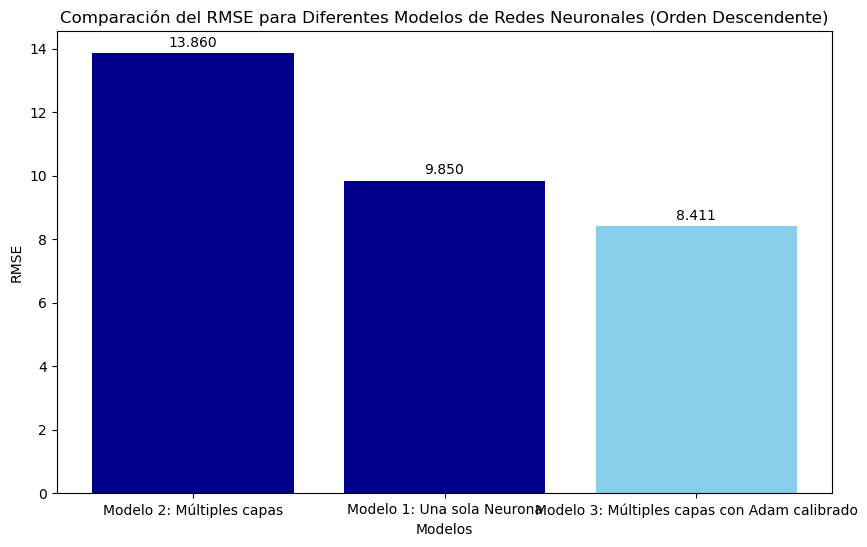

In [46]:
model_names = ['Modelo 1: Una sola Neurona', 'Modelo 2: Múltiples capas', 'Modelo 3: Múltiples capas con Adam calibrado']
rmse_values = [9.85, 13.86, 8.411]
data = sorted(zip(model_names, rmse_values), key=lambda x: x[1], reverse=True)
sorted_model_names, sorted_rmse_values = zip(*data)
plt.figure(figsize=(10, 6))
plt.bar(sorted_model_names, sorted_rmse_values, color=['darkblue', 'darkblue', 'skyblue'])
plt.title('Comparación del RMSE para Diferentes Modelos de Redes Neuronales (Orden Descendente)')
plt.xlabel('Modelos')
plt.ylabel('RMSE')
for i, v in enumerate(sorted_rmse_values):
    plt.text(i, v + 0.2, f"{v:.3f}", ha='center', color='black')
plt.show()

Como podemos observar, inicialmente daba la impresión que el modelo de una sola neurona sería mejor que de múltiples capas, pero a lo largo de las calibraciones realizadas, empleando batchnormalization, técnica de dropout y búsqueda intensiva de parámetros óptimos que incluye el learning rate, se obtuvieron los siguientes resultados:

    1. Modelo 1: Una sola Neurona / RMSE OBTENIDO: 9.85
    2. Modelo 2: Múltiples capas / RMSE OBTENIDO: 13.86
    3. Modelo 3: Múltiples capas Adam y calibración de hiperparámetros / RMSE OBTENIDO:  8.411
    
En ese sentido, el modelo 3 al tener el mejor RMSE, fue utilizado para generar las predicciones y así obtener el puntaje de 8.64070, con lo cual nuestro equipo se colocó en el ranking 5 de la competencia.

Ahora bien, respondiendo a la pregunta de interés... sí, es posible siendo que las variables indican que existiría una relación entre las características musicales de una canción y el año en que fue publicada/lanzada.